<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main_b1/day5_decision_trees_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Day 5 – Decision Trees & K-Nearest Neighbors (KNN)

In this notebook, you'll explore two powerful supervised learning models:
- Decision Trees
- K-Nearest Neighbors (KNN)

## 🧪 Dataset: Iris (Multiclass Classification)

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load data
data = load_iris()
print(data.feature_names,"\n",data.filename,"\n",data.target,"\n",data.target_names)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 iris.csv 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 
 ['setosa' 'versicolor' 'virginica']


## 🌳 Decision Tree Classifier

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



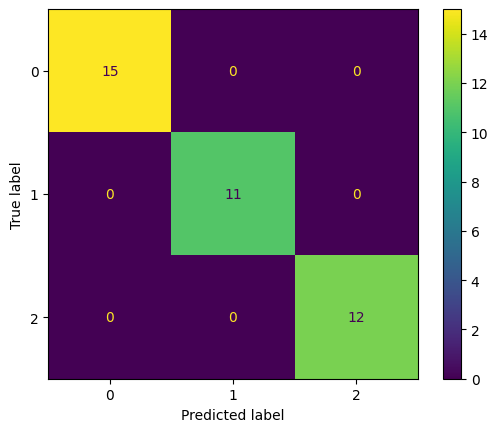

In [29]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

# Evaluate
y_pred_tree = tree.predict(X_test)
#print(y_test, y_pred_tree)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)

## 🤝 K-Nearest Neighbors (KNN) Classifier

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



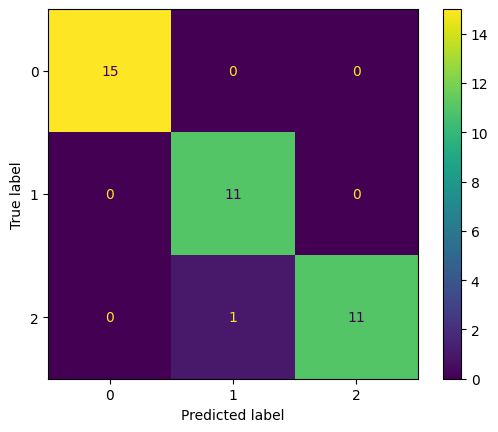

In [30]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train, y_train)

# Evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

## 🧪 Try This:
- Change `max_depth` of the tree and observe results
- Change `n_neighbors` in KNN
- Bonus: Try with `sns.load_dataset('penguins')`
- Bonus: Train on Titanic data with target = `survived`

# Train on Titanic data

In [52]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the Titanic dataset
df = sns.load_dataset('titanic')
#columns)
#print(data.feature_names,"\n",data.filename,"\n",data.target,"\n",data.target_names)
df = df.drop(['who', 'adult_male','alive','deck','embarked','embark_town'], axis=1)
df_na = df.dropna()
#print(df.head())
#df = df[df['age'].notnull() & df['survived'].notnull()]

#
# Separate target variable
X = df_na.drop('survived', axis=1)
y = df_na['survived']

# Encode categorical variable 'sex'
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['class'] = label_encoder.fit_transform(X['class'])
X['alone'] = label_encoder.fit_transform(X['alone'])
#print(X.head())

# 2. Preprocess the data
# Select relevant features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#print(X_train.head())


   pclass  sex   age  sibsp  parch     fare  class  alone
0       3    1  22.0      1      0   7.2500      2      0
1       1    0  38.0      1      0  71.2833      0      0
2       3    0  26.0      0      0   7.9250      2      1
3       1    0  35.0      1      0  53.1000      0      0
4       3    1  35.0      0      0   8.0500      2      1
     pclass  sex   age  sibsp  parch      fare  class  alone
812       2    1  35.0      0      0   10.5000      1      1
448       3    0   5.0      2      1   19.2583      2      0
657       3    0  32.0      1      1   15.5000      2      0
311       1    0  18.0      2      2  262.3750      0      0
430       1    1  28.0      0      0   26.5500      0      1


## 🌳 Decision Tree Classifier Titanic

     pclass  sex   age  sibsp  parch      fare  class  alone
812       2    1  35.0      0      0   10.5000      1      1
448       3    0   5.0      2      1   19.2583      2      0
657       3    0  32.0      1      1   15.5000      2      0
311       1    0  18.0      2      2  262.3750      0      0
430       1    1  28.0      0      0   26.5500      0      1
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       107
           1       0.73      0.61      0.67        72

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



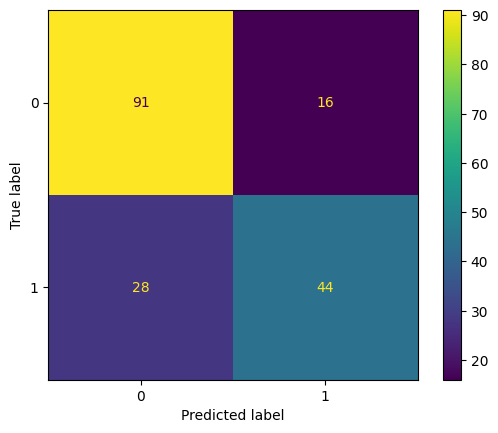

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
#print(X_train.head())
# Evaluate
y_pred_tree = tree.predict(X_test)
#print(y_test, y_pred_tree)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)

# 🤝 K-Nearest Neighbors (KNN) Classifier Titanic

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       107
           1       0.60      0.47      0.53        72

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.65      0.66      0.65       179



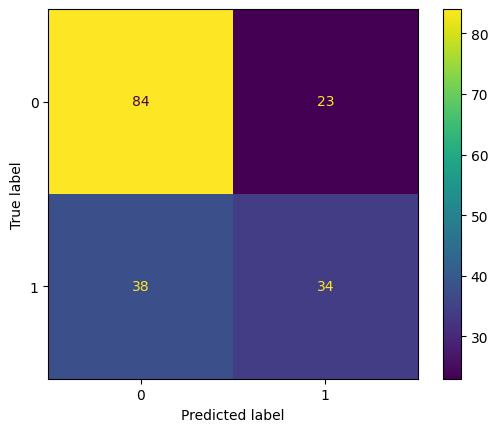

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)